In [1]:
#libraries
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as pl
import pandas as pd
import time
import requests
import urllib.request
from bs4 import BeautifulSoup
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#Q1. Scraping Wikipedia for Billboard Top 100.

with urllib.request.urlopen('https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970') as response:
   wiki_chart = response.read()
soup = BeautifulSoup(wiki_chart, "lxml")
tables = soup.find('table', attrs={'class':'wikitable sortable'})

In [3]:
song_list = []
tr_list = tables.find_all('tr')
for tr in tr_list:
    td_list = tr.find_all('td')
    if td_list == [] :
        td_list = []
    else : 
        ranking = td_list[0].get_text()
        title = td_list[1].get_text()
        band_singer = td_list[2].get_text()
        soup_of_link = BeautifulSoup(str(td_list), "lxml")
        url = td_list[2].a["href"]
        dict_entry = {'band_singer' : band_singer,
        'ranking' : ranking,
        'title' : title,
        'url' : url}
        song_list.append(dict_entry)

In [4]:
song_list[1:4]

[{'band_singer': 'The Carpenters\n',
  'ranking': '2',
  'title': '"(They Long to Be) Close to You"',
  'url': '/wiki/The_Carpenters'},
 {'band_singer': 'The Guess Who\n',
  'ranking': '3',
  'title': '"American Woman"',
  'url': '/wiki/The_Guess_Who'},
 {'band_singer': 'B.J. Thomas\n',
  'ranking': '4',
  'title': '"Raindrops Keep Fallin\' on My Head"',
  'url': '/wiki/B.J._Thomas'}]

In [5]:
#1.2 Generalize the previous: scrape Wikipedia from 1992 to 2014
yearstext = {}
for year in range(1992, 2015):
    with urllib.request.urlopen(f'https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_%s' % year) as response:
        year_text = {year : response.read()}
        yearstext.update(year_text)
        time.sleep(1)

In [6]:
yearstext

{1992: b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Billboard Year-End Hot 100 singles of 1992 - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Billboard_Year-End_Hot_100_singles_of_1992","wgTitle":"Billboard Year-End Hot 100 singles of 1992","wgCurRevisionId":900740155,"wgRevisionId":900740155,"wgArticleId":24333129,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["1992 record charts","Billboard charts"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","Sep

In [7]:
#1.3 Parse and Clean data
def parse_year(the_year, yeartext_dict):
    year = the_year
    yearinfo = []
    song = []
    songurl = []
    band_singer = []
    title = []
    url = []
    title_text = ''
    i = 0
    title_string = ''
    band_singer = ''
    soup = BeautifulSoup(yearstext[year], "lxml")
    tables = soup.find('table', attrs={'class':'wikitable sortable'})
    tr_list = tables.find_all('tr')    
    for tr in tr_list:
        td_list = tr.find_all('td')
        if td_list == [] :
            td_list = []
        else : 
            ranking = tr.th.string
            links = tr.td.findAll('a')
            number_of_links = len(links)   
            if number_of_links == 0:
                songurl = [None]
                title_text = [a['title']]
                song.append(a['title'] )
            else :
                i = 0
                for a in tr.td.findAll('a') : 
                    song.append(a['title'] )
                    title_string = '\"' + a['title'] + '\"'    
                    if i == 0 :
                        title_text = title_string
                        i = i + 1
                    else :
                        title_text = title_text + ' / ' + title_string
                        i = i + 1    
                    songurl.append(a['href'])
            title = song
            tr.td.findNext('td') 
            temp = len(tr.td.findNext('td').findAll('a'))
            if temp == 0:
                singer_url = [None]
                band_singer = tr.td.findNext('td').string
                band_singer = [band_singer]
            elif temp == 1:
                singer_url = tr.td.findNext('td').a['href']
                singer_url = [singer_url]
                band_singer = tr.td.findNext('td').a.string
                band_singer = [band_singer]
            else:
                singer_url = []
                band_singer = []
                for a in tr.td.findNext('td').findAll('a'):
                    webpage = a['href']
                    singer_url.append(webpage)
                    band_singer.append(a.string)                
            dict_entry = {'band_singer' : band_singer,
            'ranking' : ranking,
            'song' : title, 'songurl': songurl, 'titletext' : title_text,
            'url' : singer_url}
            yearinfo.append(dict_entry)      
            songurl = []
            song = []
            title_string = ''
            title_text = ''    
    return(yearinfo)


In [9]:
years_dict = {}
for year in range(1992, 2015):
    years_dict.update({year : parse_year(year, yearstext)})

In [10]:
yearinfo = years_dict 

In [11]:
yearinfo

{1992: [{'band_singer': ['Boyz II Men'],
   'ranking': '1\n',
   'song': ['End of the Road'],
   'songurl': ['/wiki/End_of_the_Road'],
   'titletext': '"End of the Road"',
   'url': ['/wiki/Boyz_II_Men']},
  {'band_singer': ['Sir Mix-a-Lot'],
   'ranking': '2\n',
   'song': ['Baby Got Back'],
   'songurl': ['/wiki/Baby_Got_Back'],
   'titletext': '"Baby Got Back"',
   'url': ['/wiki/Sir_Mix-a-Lot']},
  {'band_singer': ['Kris Kross'],
   'ranking': '3\n',
   'song': ['Jump (Kris Kross song)'],
   'songurl': ['/wiki/Jump_(Kris_Kross_song)'],
   'titletext': '"Jump (Kris Kross song)"',
   'url': ['/wiki/Kris_Kross']},
  {'band_singer': ['Vanessa Williams'],
   'ranking': '4\n',
   'song': ['Save the Best for Last'],
   'songurl': ['/wiki/Save_the_Best_for_Last'],
   'titletext': '"Save the Best for Last"',
   'url': ['/wiki/Vanessa_L._Williams']},
  {'band_singer': ['TLC'],
   'ranking': '5\n',
   'song': ['Baby-Baby-Baby'],
   'songurl': ['/wiki/Baby-Baby-Baby'],
   'titletext': '"Baby-B

In [12]:
parse_year(1997, yearstext)[:5]

[{'band_singer': ['Elton John'],
  'ranking': '1\n',
  'song': ['Something About the Way You Look Tonight',
   'Candle in the Wind 1997'],
  'songurl': ['/wiki/Something_About_the_Way_You_Look_Tonight',
   '/wiki/Candle_in_the_Wind_1997'],
  'titletext': '"Something About the Way You Look Tonight" / "Candle in the Wind 1997"',
  'url': ['/wiki/Elton_John']},
 {'band_singer': ['Jewel'],
  'ranking': '2\n',
  'song': ['Foolish Games', 'You Were Meant for Me (Jewel song)'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '"Foolish Games" / "You Were Meant for Me (Jewel song)"',
  'url': ['/wiki/Jewel_(singer)']},
 {'band_singer': ['Puff Daddy', 'Faith Evans', '112'],
  'ranking': '3\n',
  'song': ["I'll Be Missing You"],
  'songurl': ['/wiki/I%27ll_Be_Missing_You'],
  'titletext': '"I\'ll Be Missing You"',
  'url': ['/wiki/Sean_Combs', '/wiki/Faith_Evans', '/wiki/112_(band)']},
 {'band_singer': ['Toni Braxton'],
  'ranking': '4\n',
  'so

In [13]:
import json

In [14]:
fd = open("yearinfo.json","w+")
json.dump(yearinfo, fd)
fd.close()
del yearinfo

In [15]:
with open("yearinfo.json", "r") as fd:
    yearinfo = json.load(fd)

In [16]:
#1.4 Construct a year-song-singer dataframe from the yearly information

rows = []
for year in yearinfo.keys():
    for song in yearinfo[year]:
        song['year'] = year
        rows.append(song) 

In [17]:
rows

[{'band_singer': ['Boyz II Men'],
  'ranking': '1\n',
  'song': ['End of the Road'],
  'songurl': ['/wiki/End_of_the_Road'],
  'titletext': '"End of the Road"',
  'url': ['/wiki/Boyz_II_Men'],
  'year': '1992'},
 {'band_singer': ['Sir Mix-a-Lot'],
  'ranking': '2\n',
  'song': ['Baby Got Back'],
  'songurl': ['/wiki/Baby_Got_Back'],
  'titletext': '"Baby Got Back"',
  'url': ['/wiki/Sir_Mix-a-Lot'],
  'year': '1992'},
 {'band_singer': ['Kris Kross'],
  'ranking': '3\n',
  'song': ['Jump (Kris Kross song)'],
  'songurl': ['/wiki/Jump_(Kris_Kross_song)'],
  'titletext': '"Jump (Kris Kross song)"',
  'url': ['/wiki/Kris_Kross'],
  'year': '1992'},
 {'band_singer': ['Vanessa Williams'],
  'ranking': '4\n',
  'song': ['Save the Best for Last'],
  'songurl': ['/wiki/Save_the_Best_for_Last'],
  'titletext': '"Save the Best for Last"',
  'url': ['/wiki/Vanessa_L._Williams'],
  'year': '1992'},
 {'band_singer': ['TLC'],
  'ranking': '5\n',
  'song': ['Baby-Baby-Baby'],
  'songurl': ['/wiki/Baby

In [18]:
band_singer = []
songurl = ''
title_text = ''
singer_url = []
starting_length = len(rows)
for dics in rows: 
    if starting_length == 0:
        break
    dict_add = {}
    if len(dics['band_singer']) > 1:
        i = 0
        j = len(dics['band_singer'])
        
        for value in dics['band_singer']:
            # new dictionary entry to append to our list
            dict_add = {'band_singer' : dics['band_singer'][i],
            'ranking' : dics['ranking'],
            'song' : dics['song'], 'songurl': dics['songurl'], 'titletext' : dics['titletext'],
            'url' : dics['url'][i], 'year' : dics['year']}
            rows.append(dict_add)
            i = 1 + i
            j = j - 1
    starting_length = starting_length - 1

rows2 = []
band_singer = []
for dics in rows:
    if len(dics['band_singer']) == 1 or len(dics['band_singer']) > 5:
        rows2.append(dics)
for row in rows2:
    for key in row:
        row[key] = str(row[key])
        row[key] = row[key].strip("[]")
        row[key] = row[key].strip("''")
        

In [19]:
rows2

[{'band_singer': 'Boyz II Men',
  'ranking': '1\n',
  'song': 'End of the Road',
  'songurl': '/wiki/End_of_the_Road',
  'titletext': '"End of the Road"',
  'url': '/wiki/Boyz_II_Men',
  'year': '1992'},
 {'band_singer': 'Sir Mix-a-Lot',
  'ranking': '2\n',
  'song': 'Baby Got Back',
  'songurl': '/wiki/Baby_Got_Back',
  'titletext': '"Baby Got Back"',
  'url': '/wiki/Sir_Mix-a-Lot',
  'year': '1992'},
 {'band_singer': 'Kris Kross',
  'ranking': '3\n',
  'song': 'Jump (Kris Kross song)',
  'songurl': '/wiki/Jump_(Kris_Kross_song)',
  'titletext': '"Jump (Kris Kross song)"',
  'url': '/wiki/Kris_Kross',
  'year': '1992'},
 {'band_singer': 'Vanessa Williams',
  'ranking': '4\n',
  'song': 'Save the Best for Last',
  'songurl': '/wiki/Save_the_Best_for_Last',
  'titletext': '"Save the Best for Last"',
  'url': '/wiki/Vanessa_L._Williams',
  'year': '1992'},
 {'band_singer': 'TLC',
  'ranking': '5\n',
  'song': 'Baby-Baby-Baby',
  'songurl': '/wiki/Baby-Baby-Baby',
  'titletext': '"Baby-Ba

In [30]:
#1.7 Do you notice any major differences when you change the metric?

urlcache={}
def get_page(url):
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)

            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]

In [31]:
flatframe = flatframe.sort_values('year')

In [32]:
flatframe["url"].apply(get_page)

0       <!DOCTYPE html>\n<html class="client-nojs" lan...
1       <!DOCTYPE html>\n<html class="client-nojs" lan...
2       <!DOCTYPE html>\n<html class="client-nojs" lan...
3       <!DOCTYPE html>\n<html class="client-nojs" lan...
4       <!DOCTYPE html>\n<html class="client-nojs" lan...
5       <!DOCTYPE html>\n<html class="client-nojs" lan...
6       <!DOCTYPE html>\n<html class="client-nojs" lan...
7       <!DOCTYPE html>\n<html class="client-nojs" lan...
8       <!DOCTYPE html>\n<html class="client-nojs" lan...
9       <!DOCTYPE html>\n<html class="client-nojs" lan...
10      <!DOCTYPE html>\n<html class="client-nojs" lan...
11      <!DOCTYPE html>\n<html class="client-nojs" lan...
12      <!DOCTYPE html>\n<html class="client-nojs" lan...
52      <!DOCTYPE html>\n<html class="client-nojs" lan...
13      <!DOCTYPE html>\n<html class="client-nojs" lan...
14      <!DOCTYPE html>\n<html class="client-nojs" lan...
15      <!DOCTYPE html>\n<html class="client-nojs" lan...
17      <!DOCT

In [33]:
#2.1 Extract information about singers and bands

def singer_band_info(url, page_text):
    bday_dict = {}
    bday = ''
    ya = ''
    soup = BeautifulSoup(page_text[url], "lxml")
    tables = soup.find('table', attrs={'class':'infobox vcard plainlist'})
    if (tables == None):
        tables = soup.find('table', attrs={'class':'infobox biography vcard'})
    bday = tables.find('span', {'class': 'bday'})
    if bday: 
        bday = bday.get_text()[:4]
        bday_dict = {'url' : url, 'born' : bday, 'ya' : ya}
    else:
        ya = False
        for tr in tables.find_all('tr'):
            if hasattr(tr.th, 'span'):
                if hasattr(tr.th.span, 'string'):
                    if tr.th.span.string == 'Years active':                
                        if hasattr(tr.th, 'span'):
                            #ya = tr.td.string
                            ya = tr.td.text   #DK add
                            bday = 'False'
                            bday_dict = {'url' : url, 'born' : 'False', 'ya' : ya}
    return(bday_dict)


In [37]:
url = '/wiki/Iggy_Azalea'
result = singer_band_info(url, urlcache)

In [38]:
result

{'url': '/wiki/Iggy_Azalea', 'born': '1990', 'ya': ''}

In [39]:
#2.2 Merging this information in
list_of_addit_dicts = []
bday_dict = {}
for url in urlcache.keys():   
    try:
        bday_dict = singer_band_info(url, urlcache)
        list_of_addit_dicts.append(bday_dict)
    except:
        break

In [40]:
list_of_addit_dicts

[{'url': '/wiki/Boyz_II_Men', 'born': 'False', 'ya': '1985–present'},
 {'url': '/wiki/Sir_Mix-a-Lot', 'born': '1963', 'ya': ''},
 {'url': '/wiki/Kris_Kross', 'born': 'False', 'ya': '1991–1996, 2006–2013'},
 {'url': '/wiki/Vanessa_L._Williams', 'born': '1963', 'ya': ''},
 {'url': '/wiki/TLC_(band)', 'born': 'False', 'ya': '1990–present'},
 {'url': '/wiki/Eric_Clapton', 'born': '1945', 'ya': ''},
 {'url': '/wiki/En_Vogue', 'born': 'False', 'ya': '1989–present'},
 {'url': '/wiki/Red_Hot_Chili_Peppers',
  'born': 'False',
  'ya': '1983\xa0(1983)–present'},
 {'url': '/wiki/Color_Me_Badd',
  'born': 'False',
  'ya': '1985\xa0(1985)–1998  2010–present'},
 {'url': '/wiki/Jon_Secada', 'born': '1961', 'ya': ''},
 {'url': '/wiki/Shanice', 'born': '1973', 'ya': ''},
 {'url': '/wiki/Mr._Big_(band)',
  'born': 'False',
  'ya': '1988–20022009–present'},
 {'url': '/wiki/Right_Said_Fred', 'born': 'False', 'ya': '1989–present'},
 {'url': '/wiki/George_Michael', 'born': '1963', 'ya': ''},
 {'url': '/wiki

In [42]:
additional_df = pd.DataFrame(list_of_addit_dicts)

In [43]:
largedf = pd.merge(flatframe, additional_df, left_on='url', right_on='url', how="outer")

     year        band_singer ranking  born year_minus_born
160  1992          Amy Grant    52\n  1960              32
69   1992    Billy Ray Cyrus    15\n  1961              31
135  1992        Bobby Brown    33\n  1969              23
193  1995        Bryan Adams    16\n  1959              36
98   1992      CeCe Peniston    20\n  1969              23
183  1998        Celine Dion    13\n  1968              30
133  1997         Elton John     1\n  1947              50
32   1996       Eric Clapton    19\n  1945              51
59   1992     George Michael    26\n  1963              29
154  1992             Hammer    46\n  1962              30
49   1992         Jon Secada    10\n  1961              31
187  1992        Karyn White    63\n  1965              27
202  1992     Kathy Troccoli    79\n  1958              34
105  1994            Madonna    13\n  1958              36
90   2005       Mariah Carey     1\n  1969              36
167  1994     Michael Bolton    32\n  1953              

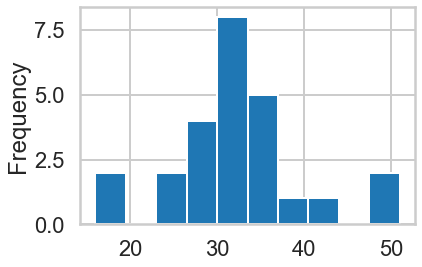

In [47]:
#2.3 What is the age at which singers achieve their top ranking?
new_df = pd.DataFrame(np.array(largedf[['year', 'band_singer', 'ranking', 'born']]))
new_df.columns = ['year', 'band_singer', 'ranking', 'born']
new_df['born'] = pd.to_numeric(new_df['born'], errors='coerce').fillna(0).astype(np.int64)                     #convert to int
new_df['year_minus_born'] = new_df['year'] - new_df['born']
sorted_df = new_df.sort_values(['band_singer', 'ranking']);
filtered_df = sorted_df.drop_duplicates(subset='band_singer', keep='first')
filtered_df = filtered_df.query('born > 0')
print(filtered_df)
filtered_df.groupby('band_singer')['year_minus_born'].aggregate(np.sum).sort_values(ascending=False).plot.hist(bins=10)